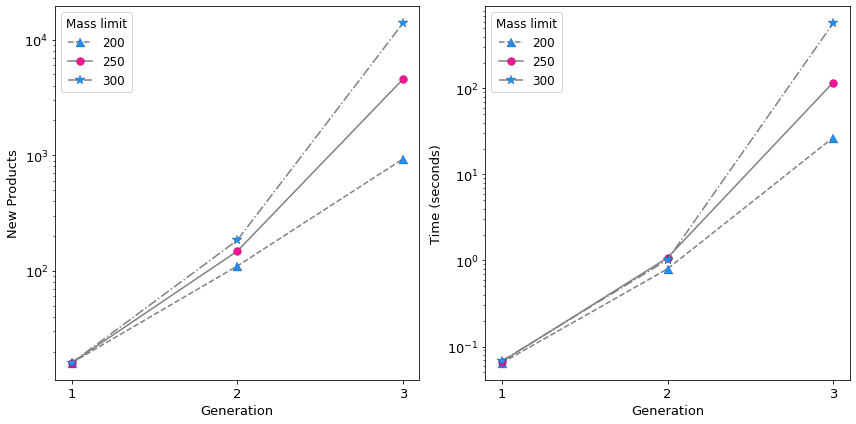

In [1]:
import matplotlib.pyplot as plt

# sorry for the spaghetti code, I know it can be written much more compactly but I was rushing.
gen = [1, 2, 3]

time_200 = [0.06462, 0.79871, 26.78112]
products_200 = [16, 110, 926]

time_250 = [0.06683, 1.07613, 117.04779]
products_250 = [16, 148, 4537]

time_300 = [0.06804, 1.02086, 571.16982]
products_300 = [16, 184, 13832]

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(12, 6))

axes[0].plot(gen, products_200, color='gray', marker='^', ms=9, mec='k', mew=0.2,
			 mfc='dodgerblue', ls='--', label='200')
axes[0].plot(gen, products_250, color='gray', marker='o', ms=8, mec='k', mew=0.2,
			 mfc='deeppink', ls='-', label='250')
axes[0].plot(gen, products_300, color='gray', marker='*', ms=11, mec='k', mew=0.2,
			 mfc='dodgerblue', ls='-.', label='300')
axes[0].set_xlabel('Generation', fontsize=13)
axes[0].set_ylabel('New Products', fontsize=13)
axes[0].legend(loc='upper left', title='Mass limit', fontsize=12, title_fontsize=12)
axes[0].set_xticks([1, 2, 3])
axes[0].set_yscale('log')
axes[1].plot(gen, time_200, color='gray', marker='^', ms=9, mec='k', mew=0.2,
			 mfc='dodgerblue', ls='--', label='200')
axes[1].plot(gen, time_250, color='gray', marker='o', ms=8, mec='k', mew=0.2,
			 mfc='deeppink', ls='-', label='250')
axes[1].plot(gen, time_300, color='gray', marker='*', ms=11, mec='k', mew=0.2,
			 mfc='dodgerblue', ls='-.', label='300')
axes[1].set_xlabel('Generation', fontsize=13)
axes[1].set_ylabel('Time (seconds)', fontsize=13)
axes[1].legend(loc='upper left', title='Mass limit', fontsize=12, title_fontsize=12)
axes[1].set_xticks([1,2,3])
axes[1].set_yscale('log')



# make ticks larger:
axes[0].tick_params(axis='both', labelsize=13)
axes[1].tick_params(axis='both', labelsize=13)

plt.tight_layout()
plt.savefig('mass_limit_effect.jpg', dpi=300)
plt.show()

In [ ]:
"""
Plot how the number of products, number of times a rule was applied, and the running time varied
each generation.
"""


import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# find number of rule applications from the rule_count csv
rule_count_data = pd.read_csv('../main/glucose/glucose_rule_count_aug2021.tsv', sep='\t', header=0)
# sum each column
reaction_count_list = [sum(rule_count_data[f'Generation {n}']) for n in range(1, 6)] # sum for gens 1 to 5
print(reaction_count_list)

products_count_list = np.zeros(5, dtype=int)

# find products in g1 to g5
with open('../main/glucose/glucose_degradation_output_10mar.txt') as glu_out:
	lines = glu_out.readlines()
	for line in lines:
		items = line.split('\t')
		gen = items[0]
		gen_id = int(gen[1])
		if gen_id > 0: # ignore G0 
			products_count_list[gen_id-1] += 1

generations = [i for i in range(1, 6)]

# The values below were taken from the January dump.
# Took 0.1533055305480957 seconds to complete round 1
# Took 1.6984524726867676 seconds to complete round 2
# Took 57.59745121002197 seconds to complete round 3
# Took 3837.0811083316803 seconds to complete round 4
# Took 241417.73176431656 seconds to complete round 5

# convert into hours
time_taken_list = [x/3600 for x in (0.1533, 1.6984, 57.5974, 3837.0811, 241417.7317)]
fig, count_ax = plt.subplots(figsize=(6, 6))
time_ax = count_ax.twinx()
# plot
products = count_ax.plot(generations, products_count_list, color='silver', mfc='cornflowerblue', marker='^',
						mew=0.3, mec='k', ms=9, label='Products')
rules = count_ax.plot(generations, reaction_count_list, color='darkgray', mfc='cornflowerblue', marker='*', mec='k',
						mew=0.3, ms=12, ls='-.', label='Rule Applications')
time = time_ax.plot(generations, time_taken_list, color='darkgray', ls='--', marker='o', mfc='deeppink', mec='k', mew=0.3,
						 ms=8, label='Computation time',)

plt.xticks(generations)

count_ax.set_xlabel('Generation', fontsize=12)
count_ax.set_ylabel('Count', color='cornflowerblue', fontsize=12)
count_ax.set_yscale('log')
time_ax.set_ylabel('Time taken (h)', color='deeppink', fontsize=12)
time_ax.set_yscale('log')

plots = products + rules + time
legend_labels = [p.get_label() for p in plots]
plt.legend(plots, legend_labels, loc=0, fontsize=12)
plt.subplots_adjust(right=0.88)
plt.savefig('growth_by_gen.png', dpi=300)
plt.show()